<a href="https://colab.research.google.com/github/ltpdo/GradeDistribution/blob/%E3%82%A2%E3%83%B3%E3%82%B5%E3%83%B3%E3%83%96%E3%83%AB%E5%AD%A6%E7%BF%92/%E6%88%90%E7%B8%BE%E5%8E%9F%E7%B0%BF%E3%81%AE%E4%BB%95%E5%88%86%E3%81%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ライブラリ等のインポート

In [ ]:
# Google Driveとの接続
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/卒論/成績データ/成績原簿')

Mounted at /content/drive


In [ ]:
# ライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sp
import seaborn as sns

# グラフの日本語化
!pip install japanize_matplotlib
import japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 14.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=8974d5dc56299ff39bea9489d6d4831f3d81b2fb60d5b2c23dfeec1332dd592f
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize_matplotlib


In [ ]:
# 機械学習用のライブラリ
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# データの読み込み

In [ ]:
# データの読み込み
gradeData = pd.read_csv("csvファイル 成績データ.csv")
print(len(gradeData))
gradeData.head()

26


,StudentID,0FF00002,0FD20002,0FD10106,0FD10201,0FD10203,0FD10209,0FD10230,0FD10232,0FD10233,0FD10235,0FD10236,0FD10237,0FD10273,0FD10278,0FD10279,0FD10280
0,1,S,S,S,A,A,C,A,NaN,B,A,B,NaN,S,A,A,NaN
1,2,C,S,A,S,S,B,B,B,C,B,D,S,A,A,A,S
2,3,A,S,S,A,S,S,S,A,A,B,A,S,S,S,A,S
3,4,A,S,S,A,S,S,S,B,C,S,A,A,S,S,B,A
4,5,B,S,S,S,S,S,A,A,B,A,A,E,S,S,S,S


In [ ]:
# データの型の確認
gradeData.dtypes

StudentID     int64
0FF00002     object
0FD20002     object
0FD10106     object
0FD10201     object
0FD10203     object
0FD10209     object
0FD10230     object
0FD10232     object
0FD10233     object
0FD10235     object
0FD10236     object
0FD10237     object
0FD10273     object
0FD10278     object
0FD10279     object
0FD10280     object
dtype: object

# データの前処理

## 欠損値の確認

In [ ]:
# データの欠損値の確認
gradeData.isnull().sum()

StudentID    0
0FF00002     0
0FD20002     0
0FD10106     0
0FD10201     0
0FD10203     0
0FD10209     0
0FD10230     0
0FD10232     2
0FD10233     1
0FD10235     0
0FD10236     1
0FD10237     3
0FD10273     0
0FD10278     0
0FD10279     2
0FD10280     3
dtype: int64

## 科目コードから科目名に変更

In [ ]:
gradeData = gradeData.rename(columns = {
    "0FF00002":"基礎数学", "0FD20002":"プログラミング入門", "0FD10106":"プログラミング基礎I", "0FD10201":"情報リテラシー",
    "0FD10203":"情報科学基礎演習", "0FD10209":"プログラミング基礎II", "0FD10230":"計算機構成論I", "0FD10232":"計算機構成論II",
    "0FD10233":"ハードウェア設計I", "0FD10235":"データ構造とアルゴリズムI", "0FD10236":"ハードウェア設計II",
    "0FD10237":"ハードウェア実験I", "0FD10273":"情報科学演習I", "0FD10275":"情報科学演習II", "0FD10278":"モバイルプログラミング演習",
    "0FD10279":"AIプログラミング演習", "0FD10280":"データ構造とアルゴリズムI演習"
})

## カテゴリカル変数を数値にする

In [ ]:
# 成績の評価のみを取り出す
target_col = gradeData.columns.difference(["StudentID"])
gradeData_target_col = gradeData[target_col]
gradeData_target_col.head()

,AIプログラミング演習,データ構造とアルゴリズムI,データ構造とアルゴリズムI演習,ハードウェア実験I,ハードウェア設計I,ハードウェア設計II,プログラミング入門,プログラミング基礎I,プログラミング基礎II,モバイルプログラミング演習,基礎数学,情報リテラシー,情報科学基礎演習,情報科学演習I,計算機構成論I,計算機構成論II
0,A,A,NaN,NaN,B,B,S,S,C,A,S,A,A,S,A,NaN
1,A,B,S,S,C,D,S,A,B,A,C,S,S,A,B,B
2,A,B,S,S,A,A,S,S,S,S,A,A,S,S,S,A
3,B,S,A,A,C,A,S,S,S,S,A,A,S,S,S,B
4,S,A,S,E,B,A,S,S,S,S,B,S,S,S,A,A


In [ ]:
# 数値に変換する(ダミー変数)
gradeData_dummy = pd.get_dummies(gradeData_target_col)
gradeData_dummy.head()

,AIプログラミング演習_A,AIプログラミング演習_B,AIプログラミング演習_C,AIプログラミング演習_S,データ構造とアルゴリズムI_A,データ構造とアルゴリズムI_B,データ構造とアルゴリズムI_C,データ構造とアルゴリズムI_S,データ構造とアルゴリズムI演習_A,データ構造とアルゴリズムI演習_B,...,情報科学演習I_B,情報科学演習I_S,計算機構成論I_A,計算機構成論I_B,計算機構成論I_C,計算機構成論I_S,計算機構成論II_A,計算機構成論II_B,計算機構成論II_C,計算機構成論II_S
0,True,False,False,False,True,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
1,True,False,False,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
2,True,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,True,True,False,False,False
3,False,True,False,False,False,False,False,True,True,False,...,False,True,False,False,False,True,False,True,False,False
4,False,False,False,True,True,False,False,False,False,False,...,False,True,True,False,False,False,True,False,False,False


In [ ]:
# 数値に変換する(ラベルエンコーディング)
# S→5、A→4、B→3、C→2、D→1、E→0
gradeData_label = gradeData
for col in gradeData_target_col.columns:
    gradeData_label[col] = gradeData[col].map({"S":5, "A":4, "B":3, "C":2, "D":1, "E":0})
gradeData_label.head()

,StudentID,基礎数学,プログラミング入門,プログラミング基礎I,情報リテラシー,情報科学基礎演習,プログラミング基礎II,計算機構成論I,計算機構成論II,ハードウェア設計I,データ構造とアルゴリズムI,ハードウェア設計II,ハードウェア実験I,情報科学演習I,モバイルプログラミング演習,AIプログラミング演習,データ構造とアルゴリズムI演習
0,1,5,5,5,4,4,2,4,NaN,3.0,4,3.0,NaN,5,4,4.0,NaN
1,2,2,5,4,5,5,3,3,3.0,2.0,3,1.0,5.0,4,4,4.0,5.0
2,3,4,5,5,4,5,5,5,4.0,4.0,3,4.0,5.0,5,5,4.0,5.0
3,4,4,5,5,4,5,5,5,3.0,2.0,5,4.0,4.0,5,5,3.0,4.0
4,5,3,5,5,5,5,5,4,4.0,3.0,4,4.0,0.0,5,5,5.0,5.0


In [ ]:
# データの型の確認
gradeData.dtypes

StudentID            int64
基礎数学                 int64
プログラミング入門            int64
プログラミング基礎I           int64
情報リテラシー              int64
情報科学基礎演習             int64
プログラミング基礎II          int64
計算機構成論I              int64
計算機構成論II           float64
ハードウェア設計I          float64
データ構造とアルゴリズムI        int64
ハードウェア設計II         float64
ハードウェア実験I          float64
情報科学演習I              int64
モバイルプログラミング演習        int64
AIプログラミング演習        float64
データ構造とアルゴリズムI演習    float64
dtype: object

## 欠損値の修正

In [ ]:
# 欠損値の修正
# 各科目ごとの平均で欠損値を補完する

for col in target_col:
  subject_mean = gradeData_label[target_col].mean()
  gradeData_label =  gradeData_label.fillna(subject_mean).round().astype(int)

gradeData_label.head()

,StudentID,基礎数学,プログラミング入門,プログラミング基礎I,情報リテラシー,情報科学基礎演習,プログラミング基礎II,計算機構成論I,計算機構成論II,ハードウェア設計I,データ構造とアルゴリズムI,ハードウェア設計II,ハードウェア実験I,情報科学演習I,モバイルプログラミング演習,AIプログラミング演習,データ構造とアルゴリズムI演習
0,1,5,5,5,4,4,2,4,4,3,4,3,4,5,4,4,5
1,2,2,5,4,5,5,3,3,3,2,3,1,5,4,4,4,5
2,3,4,5,5,4,5,5,5,4,4,3,4,5,5,5,4,5
3,4,4,5,5,4,5,5,5,3,2,5,4,4,5,5,3,4
4,5,3,5,5,5,5,5,4,4,3,4,4,0,5,5,5,5


# データの統計量

In [ ]:
# 各科目の評価を確かめる
gradeData_subject_counts = pd.DataFrame()

# 評価を数字からアルファベットに変換
grade_alphabet = {0:"E", 1:"D", 2:"C", 3:"B", 4:"A", 5:"S"}

for col in target_col:
  # 各科目の評価の数をカウント
  counts = gradeData_label[col].value_counts().sort_index()
  # 評価が0から5までの範囲に対してカウントし、評価0を補完
  counts = counts.reindex(range(6), fill_value=0)
  # 評価順をソート
  counts = counts.sort_index(ascending = False)
  # 評価をアルファベットに変更
  counts.index = counts.index.map(grade_alphabet)
  gradeData_subject_counts[col] = counts

print(gradeData_subject_counts)

             AIプログラミング演習  データ構造とアルゴリズムI  データ構造とアルゴリズムI演習  ハードウェア実験I  \
AIプログラミング演習                                                           
S                     11              8               24         11   
A                     11              9                1         11   
B                      3              6                1          2   
C                      1              3                0          0   
D                      0              0                0          0   
E                      0              0                0          2   

             ハードウェア設計I  ハードウェア設計II  プログラミング入門  プログラミング基礎I  プログラミング基礎II  \
AIプログラミング演習                                                              
S                    9          10         20          18           17   
A                    8          10          3           5            4   
B                    5           3          2           1            2   
C                    3           2          0           1    

In [ ]:
# 各科目の要約統計量
gradeData_label[target_col].describe()

,AIプログラミング演習,データ構造とアルゴリズムI,データ構造とアルゴリズムI演習,ハードウェア実験I,ハードウェア設計I,ハードウェア設計II,プログラミング入門,プログラミング基礎I,プログラミング基礎II,モバイルプログラミング演習,基礎数学,情報リテラシー,情報科学基礎演習,情報科学演習I,計算機構成論I,計算機構成論II
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,4.230769,3.846154,4.884615,4.038462,3.807692,4.000000,4.576923,4.461538,4.307692,4.538462,3.769231,4.500000,4.807692,4.692308,3.846154,3.769231
std,0.815239,1.007663,0.431455,1.341067,1.166850,1.095445,0.945434,1.028816,1.158248,0.581774,1.335895,0.905539,0.491466,0.549125,1.007663,0.862911
min,2.000000,2.000000,3.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000,1.000000,3.000000,3.000000,2.000000,2.000000
25%,4.000000,3.000000,5.000000,4.000000,3.000000,4.000000,5.000000,4.000000,4.000000,4.000000,3.000000,4.000000,5.000000,4.250000,3.000000,3.000000
50%,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
# 各生徒の評価を確かめる
gradeData_student = pd.DataFrame()

for student_id in gradeData["StudentID"].unique():
  student_data = gradeData_label.loc[gradeData["StudentID"] == student_id]
  gradeData_student[student_id] = student_data.values.flatten()

# 最初の行はStudentIDが格納されているので、削除
gradeData_student = gradeData_student.drop(0, axis = 0)
gradeData_subject_counts.columns.name = "StudentID"

# 行に教科を追加していく
gradeData_student.index.name = "Subject"

# 教科名のリスト
subjects = ["基礎数学", "プログラミング入門", "プログラミング基礎I", "情報リテラシー", "情報科学基礎演習","プログラミング基礎II",
            "計算機構成論I", "計算機構成論II", "ハードウェア設計I", "データ構造とアルゴリズムI", "ハードウェア設計II",
            "ハードウェア実験I", "情報科学演習I","モバイルプログラミング演習", "AIプログラミング演習", "データ構造とアルゴリズムI演習"]

gradeData_student.index = subjects

gradeData_student.head()

,1,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,25,26
基礎数学,5,2,4,4,3,5,2,4,2,2,...,4,5,5,5,4,3,5,5,5,4
プログラミング入門,5,5,5,5,5,4,5,5,3,3,...,5,5,5,5,5,4,5,5,5,5
プログラミング基礎I,5,4,5,5,5,4,5,5,5,1,...,5,5,5,5,5,2,4,5,5,4
情報リテラシー,4,5,4,4,5,5,5,5,4,4,...,5,5,5,5,5,5,3,5,5,4
情報科学基礎演習,4,5,5,5,5,5,5,5,5,4,...,5,5,5,5,5,3,5,5,5,5


In [ ]:
# 各生徒の評価の統計量
gradeData_student_counts = pd.DataFrame()

for col in gradeData_student.columns:
  # 各科目の評価の数をカウント
  counts = gradeData_student[col].value_counts().sort_index()
  # 評価が0から5までの範囲に対してカウントし、評価0を補完
  counts = counts.reindex(range(6), fill_value = 0)
  # 評価順をソート
  counts = counts.sort_index(ascending = False)
  # 評価をアルファベットに変更
  counts.index = counts.index.map(grade_alphabet)
  gradeData_student_counts[col] = counts

gradeData_student_counts

,1,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,25,26
1,,,,,,,,,,,,,,,,,,,,,
S,5,5,9,8,9,6,9,10,4,2,...,9,13,10,16,10,3,4,15,15,8
A,8,4,6,5,4,6,6,6,7,8,...,4,2,2,0,5,3,9,1,1,8
B,2,4,1,2,2,4,0,0,4,1,...,3,1,4,0,0,6,3,0,0,0
C,1,2,0,1,0,0,1,0,1,3,...,0,0,0,0,1,4,0,0,0,0
D,0,1,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
E,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 各生徒の要約統計量
gradeData_student_counts.describe()

,1,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,25,26
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,2.666667,2.666667,2.666667,2.666667,2.666667,2.666667,2.666667,2.666667,2.666667,2.666667,...,2.666667,2.666667,2.666667,2.666667,2.666667,2.666667,2.666667,2.666667,2.666667,2.666667
std,3.204164,1.966384,3.881580,3.204164,3.444803,3.011091,3.881580,4.320494,2.804758,2.804758,...,3.559026,5.125102,3.932768,6.531973,4.082483,2.338090,3.559026,6.055301,6.055301,4.131182
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,1.250000,0.000000,0.250000,0.250000,0.000000,0.000000,0.000000,0.250000,1.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000,0.000000,0.000000,0.000000
50%,1.500000,3.000000,0.500000,1.500000,1.500000,2.000000,0.500000,0.000000,2.500000,2.000000,...,1.500000,0.500000,1.000000,0.000000,0.500000,3.000000,1.500000,0.000000,0.000000,0.000000
75%,4.250000,4.000000,4.750000,4.250000,3.500000,5.500000,4.750000,4.500000,4.000000,2.750000,...,3.750000,1.750000,3.500000,0.000000,4.000000,3.750000,3.750000,0.750000,0.750000,6.000000
max,8.000000,5.000000,9.000000,8.000000,9.000000,6.000000,9.000000,10.000000,7.000000,8.000000,...,9.000000,13.000000,10.000000,16.000000,10.000000,6.000000,9.000000,15.000000,15.000000,8.000000


# データの可視化

## 科目ごとのヒストグラム

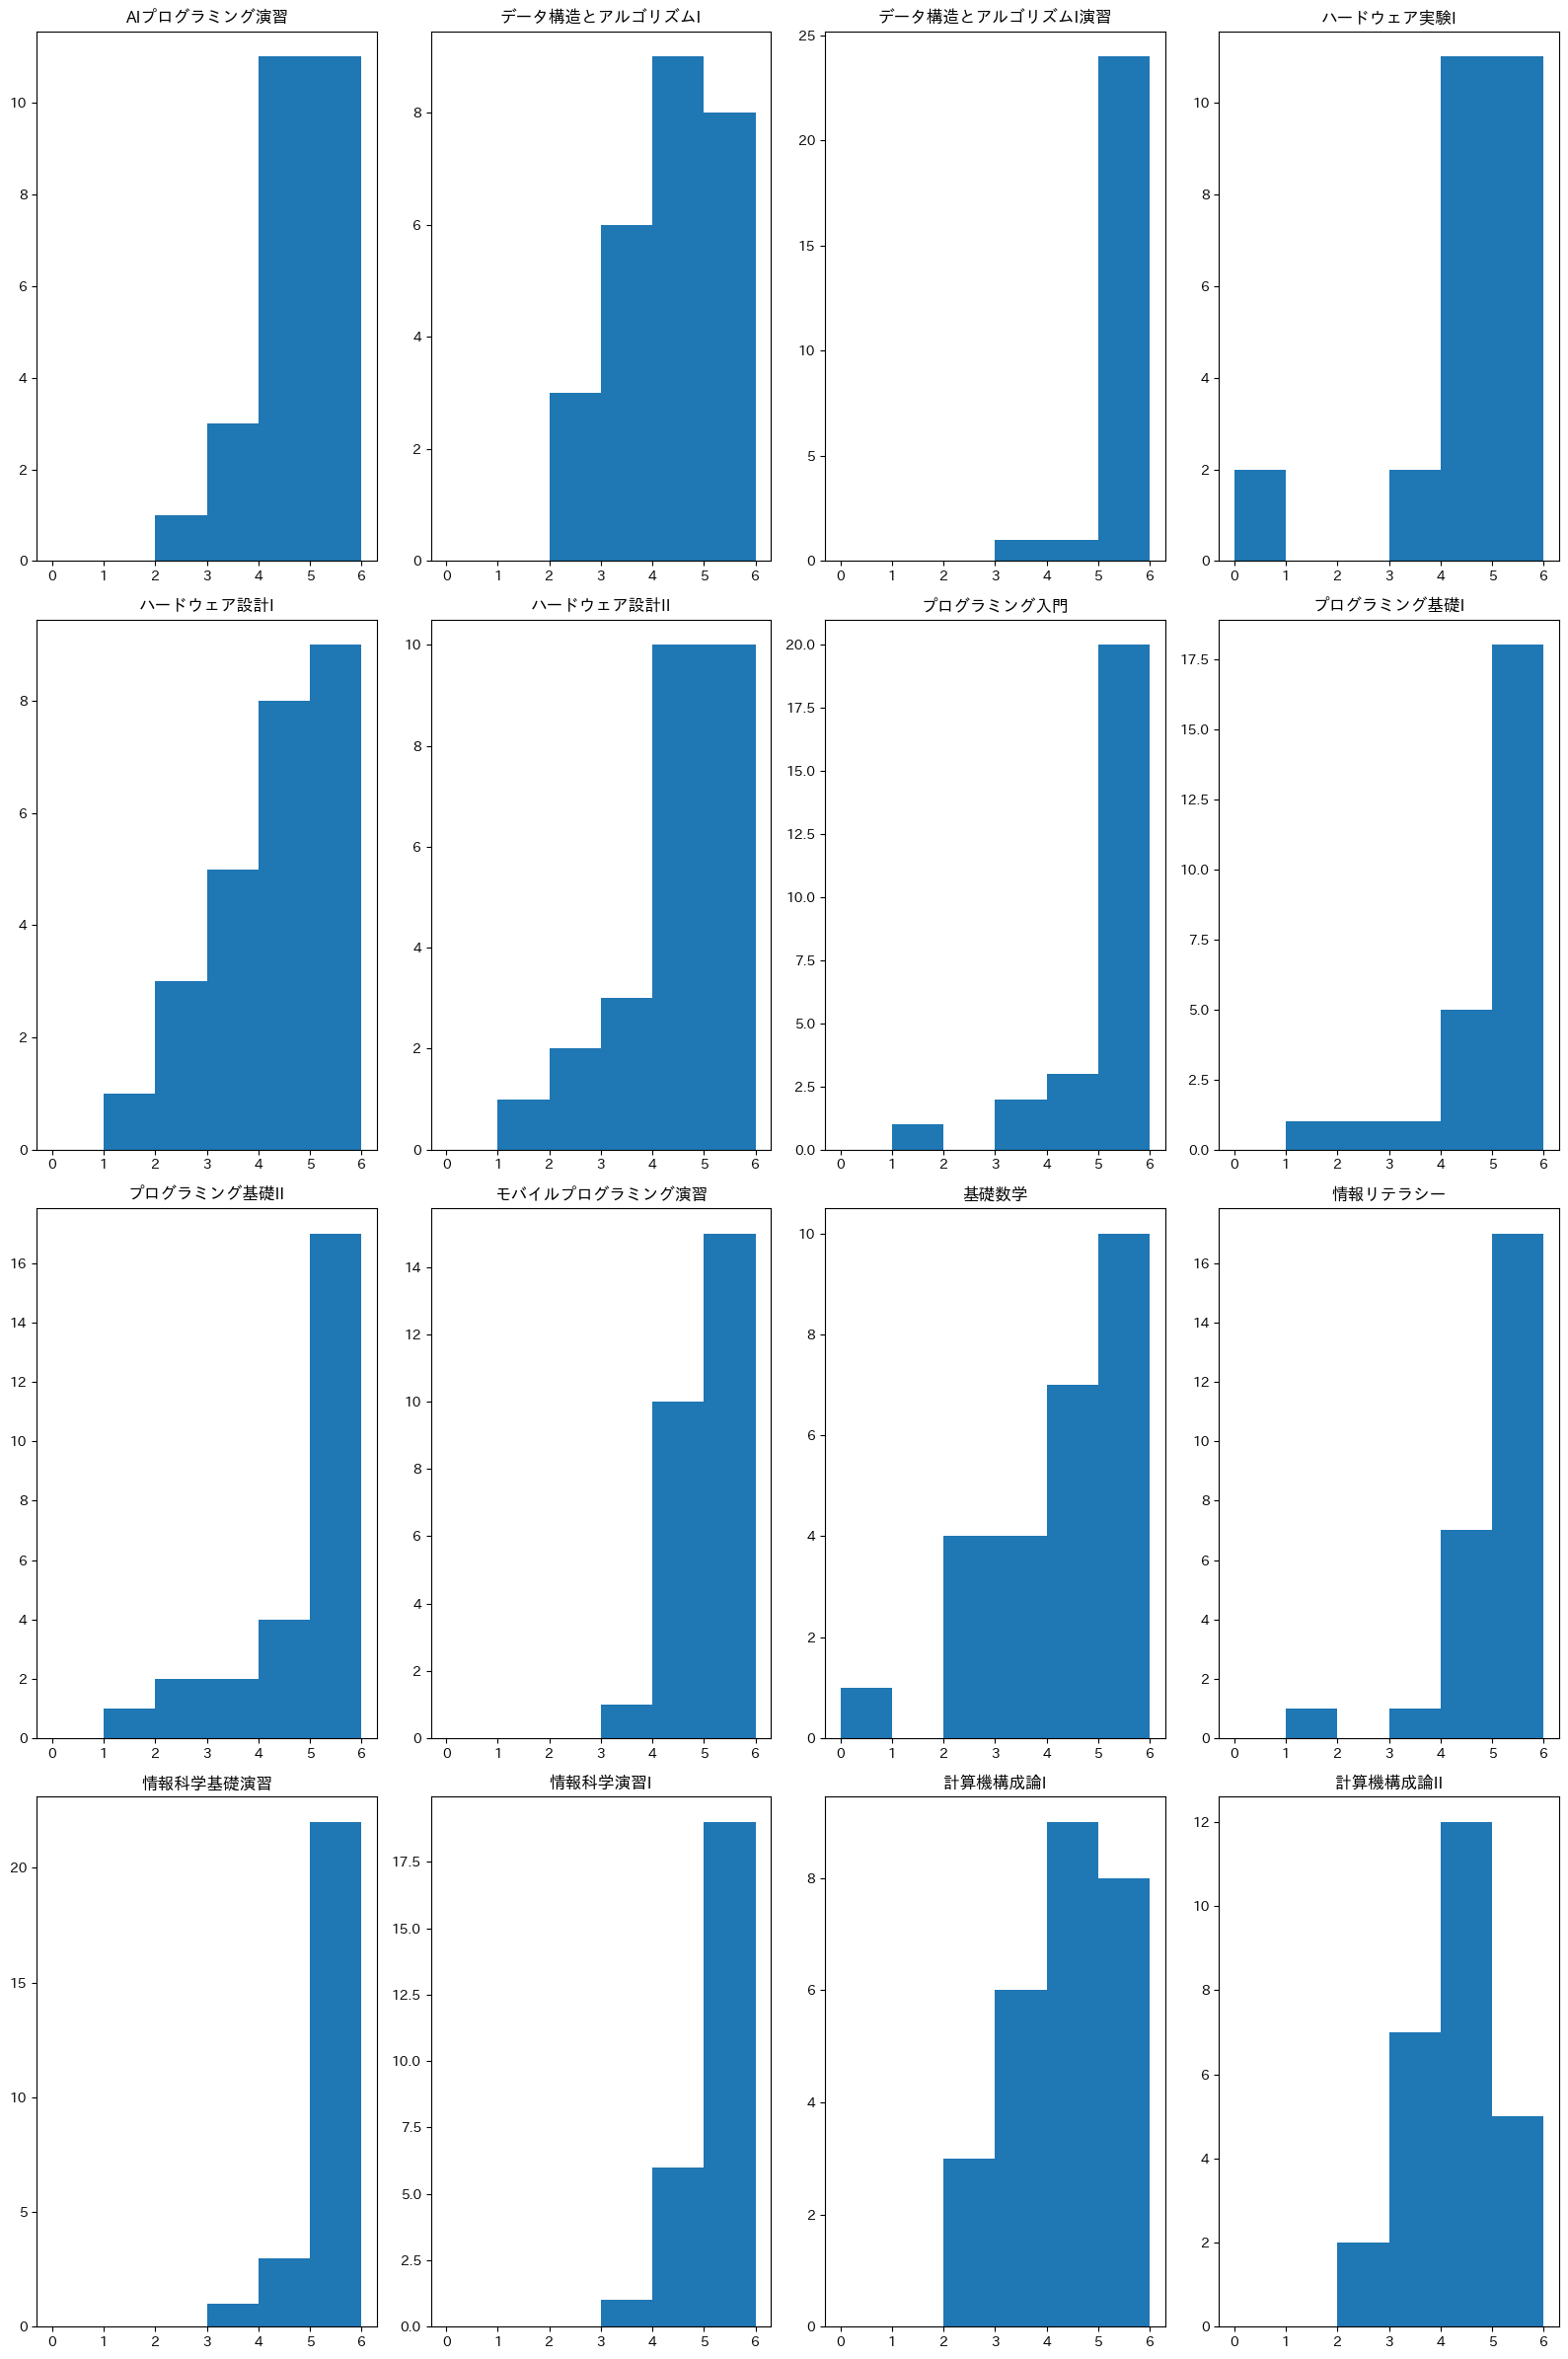

In [ ]:
# グラフの表示を設定
fig, ax = plt.subplots(4, 4, figsize=(16, 24))

# ヒストグラムの描写
for i, col in enumerate(target_col):
  ax[i // 4, i % 4].hist(gradeData_label[col], bins=6, range=(0, 6)) #グラフ
  ax[i // 4, i % 4].set_title(col) # タイトル

plt.tight_layout()
plt.show()

## 生徒ごとのヒストグラム

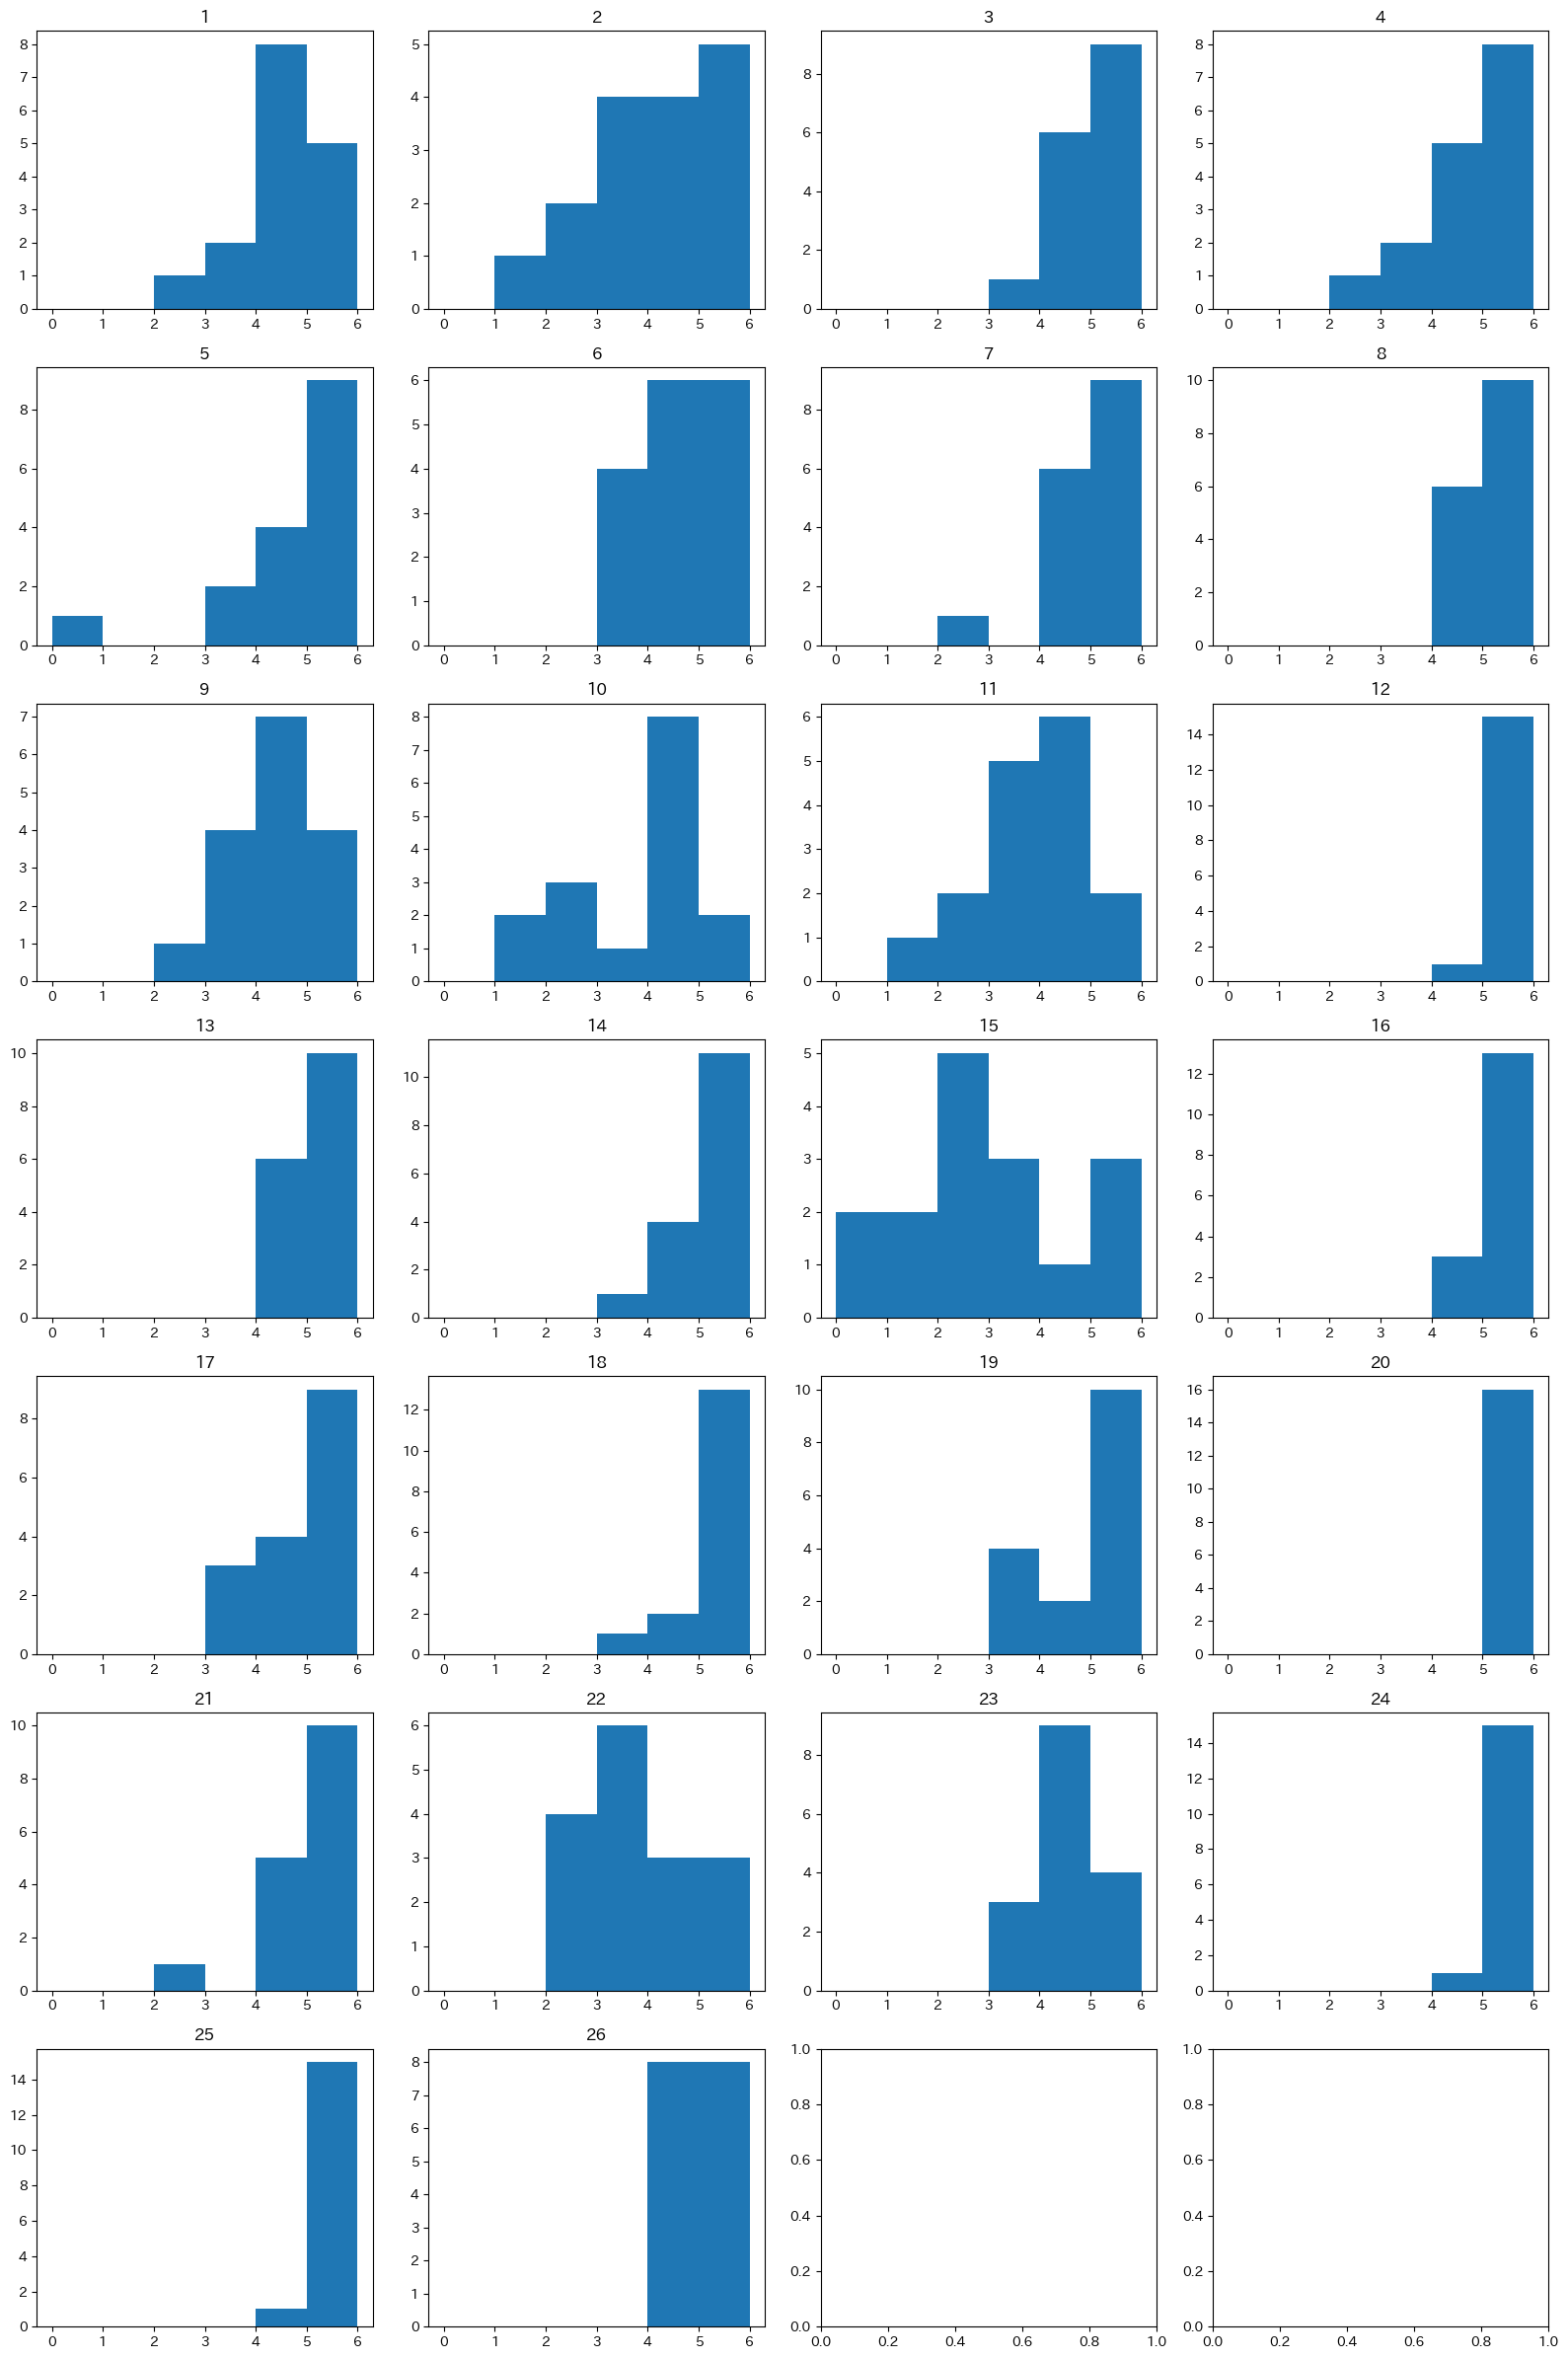

In [ ]:
# グラフの表示を設定
fig, ax = plt.subplots(7, 4, figsize=(16, 24))

# ヒストグラムの描写
for i, col in enumerate(gradeData_student.columns):
  ax[i // 4, i % 4].hist(gradeData_student[col], bins=6, range=(0, 6)) #グラフ
  ax[i // 4, i % 4].set_title(col) # タイトル

plt.tight_layout()
plt.show()

## ヒートマップ

<Axes: xlabel='StudentID', ylabel='StudentID'>

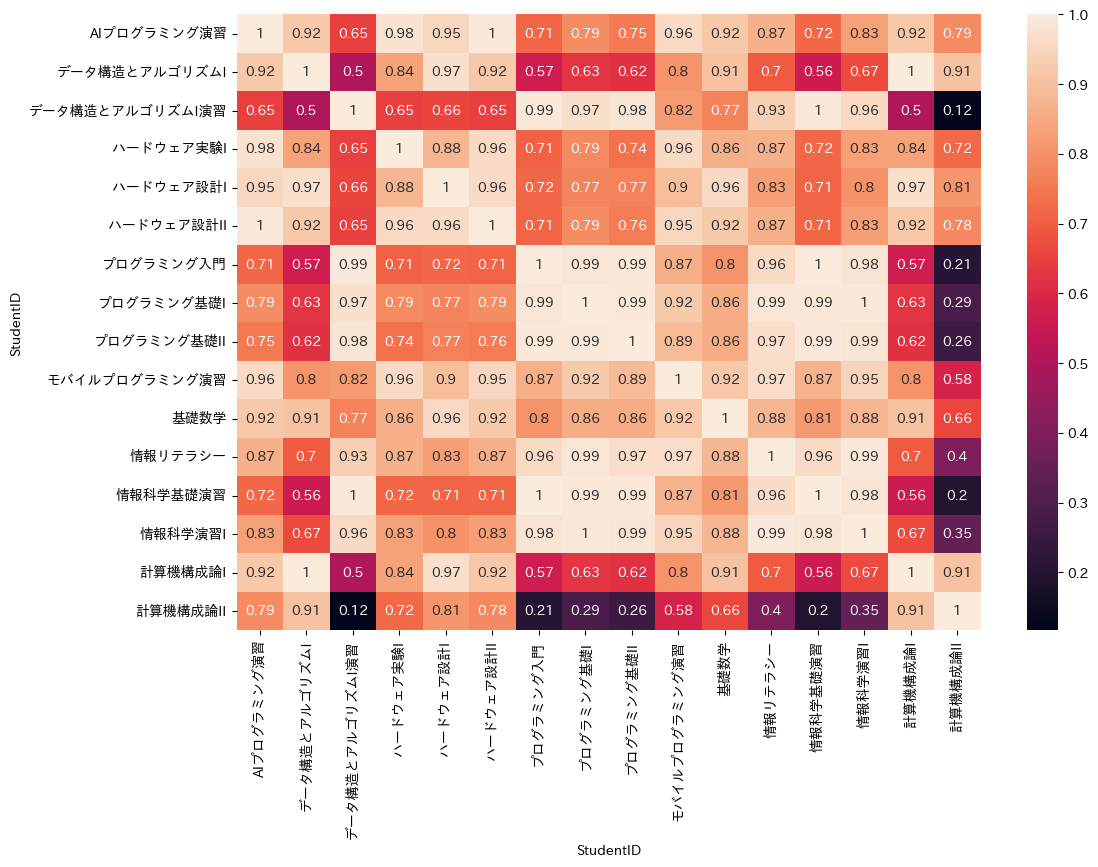

In [ ]:
gradeData_subject_counts_corr = gradeData_subject_counts.corr()
plt.figure(figsize = (12, 8))
sns.heatmap(gradeData_subject_counts_corr, annot = True)

# ハードウェア設計Iとハードウェア設計IIの関連性を調べる

In [ ]:
# ハードウェア設計Iとハードウェア設計IIのデータ
data_hardwareDesign = gradeData_student.loc[["ハードウェア設計I", "ハードウェア設計II"]]
data_hardwareDesign = data_hardwareDesign.T
data_hardwareDesign

,ハードウェア設計I,ハードウェア設計II
1,3,3
2,2,1
3,4,4
4,2,4
5,3,4
6,3,5
7,5,4
8,4,4
9,3,4
10,4,4


## 散布図

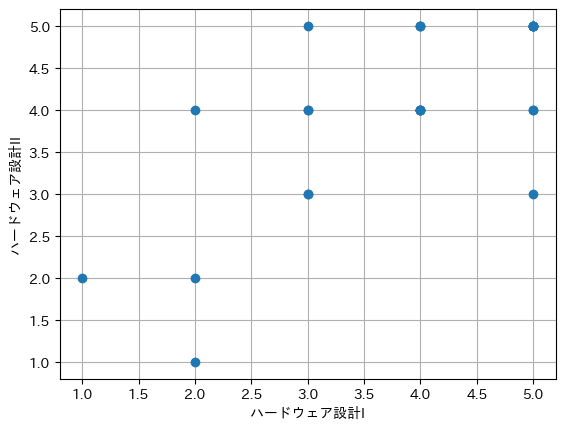

In [ ]:
# 散布図
plt.plot(data_hardwareDesign["ハードウェア設計I"], data_hardwareDesign["ハードウェア設計II"], "o")

# ラベル
plt.xlabel("ハードウェア設計I")
plt.ylabel("ハードウェア設計II")
plt.grid(True)

## 共分散・相関係数

In [ ]:
# 共分散行列
np.cov(data_hardwareDesign["ハードウェア設計I"], data_hardwareDesign["ハードウェア設計II"], ddof = 0)

array([[1.3091716 , 0.84615385],
       [0.84615385, 1.15384615]])

In [ ]:
# 相関係数
sp.stats.pearsonr(data_hardwareDesign["ハードウェア設計I"], data_hardwareDesign["ハードウェア設計II"])

PearsonRResult(statistic=0.6884574312559932, pvalue=0.00010104909418979819)

## 線形単回帰分析

In [ ]:
# 線形回帰のインスタンスを生成
reg = linear_model.LinearRegression()

# 説明変数
X = np.array(data_hardwareDesign["ハードウェア設計I"]).reshape(-1, 1)

# 目的変数
y = data_hardwareDesign["ハードウェア設計II"]

# 予測モデル
reg.fit(X, y)

# 回帰係数
print("回帰係数:", reg.coef_)

# 切片
print("切片:", reg.intercept_)

回帰係数: [0.64632768]
切片: 1.5389830508474565


## 散布図(線形回帰直線付き)

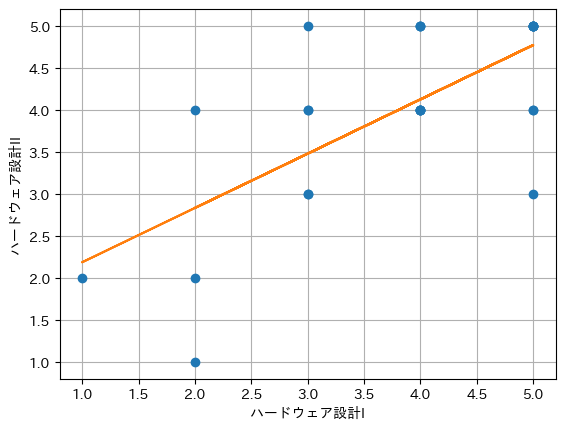

In [ ]:
# 散布図
plt.plot(data_hardwareDesign["ハードウェア設計I"], data_hardwareDesign["ハードウェア設計II"], "o")

# ラベル
plt.xlabel("ハードウェア設計I")
plt.ylabel("ハードウェア設計II")

# 線形回帰直線
plt.plot(X, reg.predict(X))
plt.grid(True)

## 決定係数

In [ ]:
# 決定係数
print("決定係数:", reg.score(X, y))

決定係数: 0.4739736346516008


# プログラミング基礎Iとプログラミング基礎IIの関連性を調べる

In [ ]:
# プログラミング基礎Iとプログラミング基礎IIのデータ
data_hardwareDesign = gradeData_student.loc[["プログラミング基礎I", "プログラミング基礎II"]]
data_hardwareDesign = data_hardwareDesign.T
data_hardwareDesign

,プログラミング基礎I,プログラミング基礎II
1,5,2
2,4,3
3,5,5
4,5,5
5,5,5
6,4,4
7,5,5
8,5,5
9,5,4
10,1,1


## 散布図

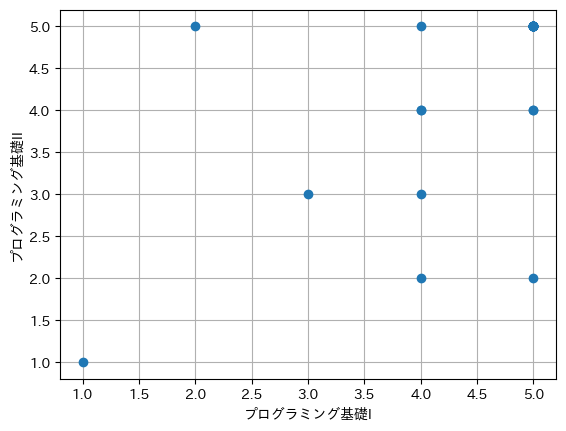

In [ ]:
# 散布図
plt.plot(data_hardwareDesign["プログラミング基礎I"], data_hardwareDesign["プログラミング基礎II"], "o")

# ラベル
plt.xlabel("プログラミング基礎I")
plt.ylabel("プログラミング基礎II")
plt.grid(True)

## 共分散・相関係数

In [ ]:
# 共分散行列
np.cov(data_hardwareDesign["プログラミング基礎I"], data_hardwareDesign["プログラミング基礎II"], ddof = 0)

array([[1.01775148, 0.66568047],
       [0.66568047, 1.28994083]])

In [ ]:
# 相関係数
sp.stats.pearsonr(data_hardwareDesign["プログラミング基礎I"], data_hardwareDesign["プログラミング基礎II"])

PearsonRResult(statistic=0.5809784882768115, pvalue=0.0018564961774337424)

## 線形単回帰分析

In [ ]:
# 線形回帰のインスタンスを生成
reg = linear_model.LinearRegression()

# 説明変数
X = np.array(data_hardwareDesign["プログラミング基礎I"]).reshape(-1, 1)

# 目的変数
y = data_hardwareDesign["プログラミング基礎II"]

# 予測モデル
reg.fit(X, y)

# 回帰係数
print("回帰係数:", reg.coef_)

# 切片
print("切片:", reg.intercept_)

回帰係数: [0.65406977]
切片: 1.3895348837209305


## 散布図(線形回帰直線付き)

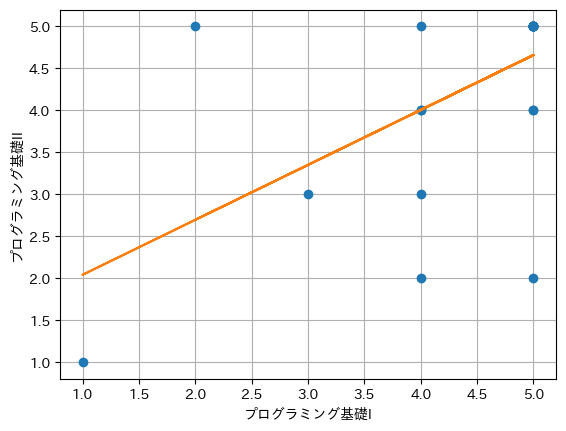

In [ ]:
# 散布図
plt.plot(gradeData_label["プログラミング基礎I"], gradeData_label["プログラミング基礎II"], "o")

# ラベル
plt.xlabel("プログラミング基礎I")
plt.ylabel("プログラミング基礎II")

# 線形回帰直線
plt.plot(X, reg.predict(X))
plt.grid(True)

## 決定係数

In [ ]:
# 決定係数
print("決定係数:", reg.score(X, y))

決定係数: 0.3375360038404096


# 科目ごとの決定係数を調べる(線形単回帰分析)

In [ ]:
# 教科名のリスト
subjects = ["基礎数学", "プログラミング入門", "プログラミング基礎I", "情報リテラシー", "情報科学基礎演習","プログラミング基礎II",
            "計算機構成論I", "計算機構成論II", "ハードウェア設計I", "データ構造とアルゴリズムI", "ハードウェア設計II",
            "ハードウェア実験I", "情報科学演習I","モバイルプログラミング演習", "AIプログラミング演習", "データ構造とアルゴリズムI演習"]

reg_score = {} # 決定係数
regression_coefficient = {} # 回帰係数
section = {} # 切片

subject_name = {}

for subject1 in subjects:
  for subject2 in subjects:
    tmp_name1 = subject1 + subject2
    tmp_name2 = subject2 + subject1
    if not(subject1 == subject2):
      if (tmp_name1 not in subject_name) & (tmp_name2 not in subject_name):
        reg = linear_model.LinearRegression()
        # 説明変数
        X = np.array(gradeData_label[subject1]).reshape(-1, 1)
        # 目的変数
        y = gradeData_label[subject2]
        # 予測モデル
        reg.fit(X, y)

        regression_coefficient[tmp_name1] = reg.coef_ # 回帰係数の追加
        section[tmp_name1] = reg.intercept_ # 切片の追加
        reg_score[tmp_name1] = reg.score(X, y) # 決定係数の追加

print(regression_coefficient)
print(section)
print(reg_score)

{'基礎数学プログラミング入門': array([0.50344828]), '基礎数学プログラミング基礎I': array([0.37586207]), '基礎数学情報リテラシー': array([0.3362069]), '基礎数学情報科学基礎演習': array([0.0637931]), '基礎数学プログラミング基礎II': array([0.33275862]), '基礎数学計算機構成論I': array([0.45]), '基礎数学計算機構成論II': array([0.21551724]), '基礎数学ハードウェア設計I': array([0.33275862]), '基礎数学データ構造とアルゴリズムI': array([0.49482759]), '基礎数学ハードウェア設計II': array([0.47068966]), '基礎数学ハードウェア実験I': array([0.54310345]), '基礎数学情報科学演習I': array([0.07068966]), '基礎数学モバイルプログラミング演習': array([0.27413793]), '基礎数学AIプログラミング演習': array([0.07586207]), '基礎数学データ構造とアルゴリズムI演習': array([0.02931034]), 'プログラミング入門基礎数学': array([1.00516351]), 'プログラミング入門プログラミング基礎I': array([0.6746988]), 'プログラミング入門情報リテラシー': array([0.69363167]), 'プログラミング入門情報科学基礎演習': array([0.12908778]), 'プログラミング入門プログラミング基礎II': array([0.64371773]), 'プログラミング入門計算機構成論I': array([0.68502582]), 'プログラミング入門計算機構成論II': array([0.42340792]), 'プログラミング入門ハードウェア設計I': array([0.48709122]), 'プログラミング入門データ構造とアルゴリズムI': array([0.68502582]), 'プログラミング入門ハードウェア設計II': array([0.4475043]), 

## 辞書型からデータフレームに変換

In [ ]:
df_regression_coefficient = pd.DataFrame.from_dict(regression_coefficient) # 回帰係数
df_section = pd.DataFrame(section, index = [0]) # 切片
df_regscore = pd.DataFrame(reg_score, index = [0]) # 決定係数
df_regscore

,基礎数学プログラミング入門,基礎数学プログラミング基礎I,基礎数学情報リテラシー,基礎数学情報科学基礎演習,基礎数学プログラミング基礎II,基礎数学計算機構成論I,基礎数学計算機構成論II,基礎数学ハードウェア設計I,基礎数学データ構造とアルゴリズムI,基礎数学ハードウェア設計II,...,データ構造とアルゴリズムI演習プログラミング基礎II,データ構造とアルゴリズムI演習計算機構成論I,データ構造とアルゴリズムI演習計算機構成論II,データ構造とアルゴリズムI演習ハードウェア設計I,データ構造とアルゴリズムI演習データ構造とアルゴリズムI,データ構造とアルゴリズムI演習ハードウェア設計II,データ構造とアルゴリズムI演習ハードウェア実験I,データ構造とアルゴリズムI演習情報科学演習I,データ構造とアルゴリズムI演習モバイルプログラミング演習,データ構造とアルゴリズムI演習AIプログラミング演習
0,0.506048,0.238192,0.246005,0.030068,0.147299,0.355909,0.111321,0.145135,0.43035,0.329483,...,0.027637,0.002454,0.214193,0.002101,0.054545,0.02865,0.021386,0.033058,0.009617,0.419039


In [ ]:
# データフレームの構成を変更
df_regscore = df_regscore.set_axis(["score"], axis = "index")
df_regscore = df_regscore.T

ValueError: Length mismatch: Expected axis has 240 elements, new values have 1 elements

In [ ]:
# データフレームを降順でソート
df_regscore = df_regscore.sort_values("score", ascending = False)
df_regscore = df_regscore[df_regscore["score"] >= 0.5]
print(len(df_regscore))
df_regscore

8


,score
AIプログラミング演習計算機構成論II,0.579201
計算機構成論IIAIプログラミング演習,0.579201
プログラミング入門情報リテラシー,0.524453
情報リテラシープログラミング入門,0.524453
モバイルプログラミング演習プログラミング入門,0.520764
プログラミング入門モバイルプログラミング演習,0.520764
プログラミング入門基礎数学,0.506048
基礎数学プログラミング入門,0.506048


# 科目ごとの決定係数を調べる(重回帰分析)

In [ ]:
gradeData_label = gradeData_label.drop("StudentID", axis = 1)
gradeData_label.head()

,基礎数学,プログラミング入門,プログラミング基礎I,情報リテラシー,情報科学基礎演習,プログラミング基礎II,計算機構成論I,計算機構成論II,ハードウェア設計I,データ構造とアルゴリズムI,ハードウェア設計II,ハードウェア実験I,情報科学演習I,モバイルプログラミング演習,AIプログラミング演習,データ構造とアルゴリズムI演習
0,5,5,5,4,4,2,4,4,3,4,3,4,5,4,4,5
1,2,5,4,5,5,3,3,3,2,3,1,5,4,4,4,5
2,4,5,5,4,5,5,5,4,4,3,4,5,5,5,4,5
3,4,5,5,4,5,5,5,3,2,5,4,4,5,5,3,4
4,3,5,5,5,5,5,4,4,3,4,4,0,5,5,5,5


## 基礎数学

In [ ]:
# 教科名のリスト
subjects = ["基礎数学", "プログラミング入門", "プログラミング基礎I", "情報リテラシー", "情報科学基礎演習","プログラミング基礎II",
            "計算機構成論I", "計算機構成論II", "ハードウェア設計I", "データ構造とアルゴリズムI", "ハードウェア設計II",
            "ハードウェア実験I", "情報科学演習I","モバイルプログラミング演習", "AIプログラミング演習", "データ構造とアルゴリズムI演習"]

# 目的変数に基礎数学を指定、説明変数はそれ以外に設定
X = gradeData_label.drop("基礎数学", axis = 1)
y = gradeData_label["基礎数学"]

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

# 重回帰クラスの初期化と学習
model = LinearRegression()
model.fit(X_train, y_train)

# 決定係数を表示
print("決定係数(train):{:.3f}".format(model.score(X_train, y_train)))
print("決定係数(test):{:.3f}".format(model.score(X_test, y_test)))

# 回帰係数と切片を表示
print("\n回帰係数\n{}".format(pd.Series(model.coef_, index = X.columns)))
print("切片; {:.3f}".format(model.intercept_))

決定係数(train):0.955
決定係数(test):-0.010

回帰係数
基礎数学              -0.145685
プログラミング基礎I         0.345861
情報リテラシー            0.366085
情報科学基礎演習          -0.647643
プログラミング基礎II       -0.295880
計算機構成論I           -0.189993
計算機構成論II           0.497151
ハードウェア設計I          0.157274
データ構造とアルゴリズムI      0.656903
ハードウェア設計II        -0.488615
ハードウェア実験I         -0.005291
情報科学演習I           -0.718368
モバイルプログラミング演習      1.715300
AIプログラミング演習       -0.282529
データ構造とアルゴリズムI演習   -0.124215
dtype: float64
切片; 1.263


## すべての科目で集計

In [ ]:
subject_score = {}
reg_intercept = {}

for subject in subjects:
  # 目的変数、説明変数
  X = gradeData_label.drop(columns = subject)
  y = gradeData_label[subject]

  # 訓練データとテストデータに分ける
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

  # 重回帰クラスの初期化と学習
  model = LinearRegression()
  model.fit(X_train, y_train)

  # 決定係数を格納
  subject_score[subject] = {"train":model.score(X_train, y_train), "test":model.score(X_test, y_test)}

  # 回帰係数と切片を格納
  reg_intercept[subject] = {"回帰係数":pd.Series(model.coef_, index = X.columns), "切片":model.intercept_}


subject_score
#reg_intercept

{'基礎数学': {'train': 0.9523786575785651, 'test': -0.6166152826050386},
 'プログラミング入門': {'train': 0.9549096990232382, 'test': -0.010168661631659193},
 'プログラミング基礎I': {'train': 0.932136114771771, 'test': -11.983492250363822},
 '情報リテラシー': {'train': 0.7931847504499304, 'test': -1.1610716306339381},
 '情報科学基礎演習': {'train': 0.9727454241925275, 'test': 0.0},
 'プログラミング基礎II': {'train': 0.9567331754639736, 'test': -4.674130233663374},
 '計算機構成論I': {'train': 0.9476294245391166, 'test': -0.3500007607512834},
 '計算機構成論II': {'train': 0.9599763352194706, 'test': -2.1590854905590335},
 'ハードウェア設計I': {'train': 0.9240776870152126, 'test': -0.3741191356181426},
 'データ構造とアルゴリズムI': {'train': 0.9704128976852017, 'test': -2.2504524696105297},
 'ハードウェア設計II': {'train': 0.9528287852508238, 'test': -3.4872049838744408},
 'ハードウェア実験I': {'train': 0.7416383898116047, 'test': -3.6525152305711837},
 '情報科学演習I': {'train': 0.9163294901996145, 'test': -11.489021284840701},
 'モバイルプログラミング演習': {'train': 0.9803576228320864, 'test': -0.

# 科目ごとの決定係数を調べる(リッジ回帰)

In [ ]:
subject_score_ridge = {}
reg_intercept_ridge = {}

for subject in subjects:
  # 目的変数、説明変数
  X = gradeData_label.drop(columns = subject)
  y = gradeData_label[subject]

  # 訓練データとテストデータに分ける
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

  # モデルの作成
  linear = LinearRegression()
  ridge = Ridge(random_state = 0)

  for model in [linear, ridge]:
    model.fit(X_train, y_train)
    # 決定係数を格納
    subject_score_ridge[subject] = {"train":model.score(X_train, y_train), "test":model.score(X_test, y_test)}

subject_score_ridge

{'基礎数学': {'train': 0.823816121959381, 'test': 0.7789300657787517},
 'プログラミング入門': {'train': 0.8449774187671859, 'test': 0.5468729388482789},
 'プログラミング基礎I': {'train': 0.8174277735583684, 'test': -0.7330372276347159},
 '情報リテラシー': {'train': 0.45069639807850326, 'test': 0.33407661184109494},
 '情報科学基礎演習': {'train': 0.8706482798825058, 'test': 0.0},
 'プログラミング基礎II': {'train': 0.9096697605240847, 'test': 0.4026297866905625},
 '計算機構成論I': {'train': 0.9072238420454478, 'test': -0.5202546533038426},
 '計算機構成論II': {'train': 0.913760393180593, 'test': -0.04618922800338332},
 'ハードウェア設計I': {'train': 0.8985655347930498, 'test': -0.1986478510900842},
 'データ構造とアルゴリズムI': {'train': 0.8750247754702357, 'test': 0.1992882626673369},
 'ハードウェア設計II': {'train': 0.8402272532425011, 'test': -0.4130717046664589},
 'ハードウェア実験I': {'train': 0.46877460810656024, 'test': 0.470089620010794},
 '情報科学演習I': {'train': 0.7571171241532966, 'test': 0.0},
 'モバイルプログラミング演習': {'train': 0.8090607602351533, 'test': 0.6455529432412106},
 'A

# 科目ごとの決定係数を調べる(決定木)

In [ ]:
subject_score_tree = {}
reg_intercept_tree = {}

for subject in subjects:
  # 目的変数、説明変数
  X = gradeData_label.drop(columns = subject)
  y = gradeData_label[subject]

  # 訓練データとテストデータに分ける
  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

  # 決定木クラスの初期化と学習
  model = DecisionTreeClassifier(criterion = "entropy", max_depth = 3, random_state = 0)
  model.fit(X_train, y_train)

  subject_score_tree[subject] = {"train":model.score(X_train, y_train), "test":model.score(X_test, y_test)}

subject_score_tree

# グリッドサーチ

## グリッドサーチ(サポートベクターマシン)

In [ ]:
subject_score_grid_svm = {}
reg_intercept_grid_svm = {}

for subject in subjects:
  # 目的変数、説明変数
  X = gradeData_label.drop(columns = subject)
  y = gradeData_label[subject]

  # 訓練データとテストデータに分ける
  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

  # GridSearchCVクラスに与えるパラメータを準備
  param_grid = {"C": np.logspace(-3, 2, num = 6), "gamma":np.logspace(-3, 2, num = 6)}

  # GridSearchCVクラスの初期化
  gs = GridSearchCV(estimator = SVC(), param_grid = param_grid, cv = 5)

  # ハイパーパラメータの組み合わせの検証とベストモデルの構築
  gs.fit(X_train, y_train)

  subject_score_grid_svm[subject] = {"best_score":gs.best_score_, "best_param":gs.best_params_, "test_score":gs.score(X_test, y_test)}

subject_score_grid_svm

## グリッドサーチ(決定木)

In [ ]:
subject_score_grid_dtc = {}

for subject in subjects:
    # 目的変数、説明変数
    X = gradeData_label.drop(columns=subject)
    y = gradeData_label[subject]

    # 訓練データとテストデータに分割
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    # GridSearchCVに与えるパラメータグリッド
    param_grid = {
        'max_depth': [3, 5, 7, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # DecisionTreeClassifierの初期化
    dtc = DecisionTreeClassifier()

    # GridSearchCVの初期化
    grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5)

    # グリッドサーチの実行
    grid_search.fit(X_train, y_train)

    # ベストパラメータとスコアの取得
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # テストデータでのスコアの取得
    test_score = grid_search.score(X_test, y_test)

    # 結果を辞書に格納
    subject_score_grid_dtc[subject] = {"best_score": best_score, "best_params": best_params, "test_score": test_score}

subject_score_grid_dtc

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

{'基礎数学': {'best_score': 0.5166666666666667,
  'best_params': {'max_depth': 5,
   'min_samples_leaf': 2,
   'min_samples_split': 2},
  'test_score': 0.2857142857142857},
 'プログラミング入門': {'best_score': 0.75,
  'best_params': {'max_depth': 3,
   'min_samples_leaf': 4,
   'min_samples_split': 2},
  'test_score': 0.42857142857142855},
 'プログラミング基礎I': {'best_score': 0.7333333333333333,
  'best_params': {'max_depth': 7,
   'min_samples_leaf': 4,
   'min_samples_split': 10},
  'test_score': 0.42857142857142855},
 '情報リテラシー': {'best_score': 0.65,
  'best_params': {'max_depth': 3,
   'min_samples_leaf': 2,
   'min_samples_split': 10},
  'test_score': 0.5714285714285714},
 '情報科学基礎演習': {'best_score': 0.8,
  'best_params': {'max_depth': 3,
   'min_samples_leaf': 1,
   'min_samples_split': 2},
  'test_score': 0.8571428571428571},
 'プログラミング基礎II': {'best_score': 0.6333333333333333,
  'best_params': {'max_depth': 7,
   'min_samples_leaf': 1,
   'min_samples_split': 2},
  'test_score': 0.42857142857142855},

## グリッドサーチ(リッジ回帰)

In [ ]:
subject_score_grid_ridge = {}

for subject in subjects:
    # 目的変数、説明変数
    X = gradeData_label.drop(columns=subject)
    y = gradeData_label[subject]

    # 訓練データとテストデータに分割
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    # GridSearchCVに与えるパラメータグリッド
    param_grid = {'alpha': np.logspace(-3, 3, num=7)}  # alphaは正則化パラメータ

    # Ridge回帰の初期化
    ridge = Ridge()

    # GridSearchCVの初期化
    grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5)

    # グリッドサーチの実行
    grid_search.fit(X_train, y_train)

    # ベストパラメータとスコアの取得
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # テストデータでのスコアの取得
    test_score = grid_search.score(X_test, y_test)

    # 結果を辞書に格納
    subject_score_grid_ridge[subject] = {"best_score": best_score, "best_params": best_params, "test_score": test_score}

subject_score_grid_ridge

{'基礎数学': {'best_score': -2.9487153070284995,
  'best_params': {'alpha': 10.0},
  'test_score': 0.61210922007733},
 'プログラミング入門': {'best_score': 0.05822057017711024,
  'best_params': {'alpha': 100.0},
  'test_score': 0.2587030494046082},
 'プログラミング基礎I': {'best_score': 0.05782724650406264,
  'best_params': {'alpha': 100.0},
  'test_score': 0.6823040725610929},
 '情報リテラシー': {'best_score': -0.04801634263677625,
  'best_params': {'alpha': 100.0},
  'test_score': -0.073380085670671},
 '情報科学基礎演習': {'best_score': 0.1534879961100852,
  'best_params': {'alpha': 100.0},
  'test_score': 0.0},
 'プログラミング基礎II': {'best_score': 0.22874681604161848,
  'best_params': {'alpha': 10.0},
  'test_score': 0.18102066230672686},
 '計算機構成論I': {'best_score': 0.035416373287517545,
  'best_params': {'alpha': 10.0},
  'test_score': -0.037626074668626996},
 '計算機構成論II': {'best_score': 0.039740359340174836,
  'best_params': {'alpha': 1.0},
  'test_score': 0.06964567608314565},
 'ハードウェア設計I': {'best_score': -0.682767578038204

## グリッドサーチ(勾配ブースティング)

In [ ]:
subject_score_grid_boost = {}

for subject in subjects:
    # 目的変数、説明変数
    X = gradeData_label.drop(columns=subject)
    y = gradeData_label[subject]

    # 訓練データとテストデータに分割
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    # GridSearchCVに与えるパラメータグリッド
    param_grid = {
        'n_estimators': [50, 100, 200],  # 決定木の数
        'learning_rate': [0.05, 0.1, 0.2],  # 学習率
        'max_depth': [3, 5, None],  # 木の深さ
        'min_samples_split': [2, 5, 10],  # 分割するための最小サンプル数
        'min_samples_leaf': [1, 2, 4]  # 葉ノードの最小サンプル数
    }

    # 勾配ブースティングの初期化
    gb = GradientBoostingRegressor()

    # GridSearchCVの初期化
    grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5)

    # グリッドサーチの実行
    grid_search.fit(X_train, y_train)

    # ベストパラメータとスコアの取得
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # テストデータでのスコアの取得
    test_score = grid_search.score(X_test, y_test)

    # 結果を辞書に格納
    subject_score_grid_boost[subject] = {"best_score": best_score, "best_params": best_params, "test_score": test_score}

subject_score_grid_boost

{'基礎数学': {'best_score': -2.9546174691857727,
  'best_params': {'learning_rate': 0.2,
   'max_depth': 3,
   'min_samples_leaf': 1,
   'min_samples_split': 10,
   'n_estimators': 100},
  'test_score': -0.20293559321227406},
 'プログラミング入門': {'best_score': 0.05301898690328608,
  'best_params': {'learning_rate': 0.05,
   'max_depth': 3,
   'min_samples_leaf': 4,
   'min_samples_split': 5,
   'n_estimators': 50},
  'test_score': 0.24256083904304093},
 'プログラミング基礎I': {'best_score': 0.20365812103446673,
  'best_params': {'learning_rate': 0.1,
   'max_depth': 3,
   'min_samples_leaf': 4,
   'min_samples_split': 10,
   'n_estimators': 50},
  'test_score': -0.6196649207005567},
 '情報リテラシー': {'best_score': 0.15714007372673405,
  'best_params': {'learning_rate': 0.1,
   'max_depth': 5,
   'min_samples_leaf': 4,
   'min_samples_split': 10,
   'n_estimators': 50},
  'test_score': 0.06627599256790606},
 '情報科学基礎演習': {'best_score': 0.1684369395868012,
  'best_params': {'learning_rate': 0.2,
   'max_depth': 

## グリッドサーチ(ランダムフォレスト)

In [ ]:
"""
subject_score_grid_random = {}

for subject in subjects:
    # 目的変数、説明変数
    X = gradeData_label.drop(columns=subject)
    y = gradeData_label[subject]

    # 訓練データとテストデータに分割
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    # GridSearchCVに与えるパラメータグリッド
    param_grid = {
        'n_estimators': [50, 100, 200],  # 決定木の数
        'max_depth': [3, 5, None],  # 木の深さ
        'min_samples_split': [2, 5, 10],  # 分割するための最小サンプル数
        'min_samples_leaf': [1, 2, 4]  # 葉ノードの最小サンプル数
    }

    # ランダムフォレストの初期化
    rf = RandomForestRegressor()

    # GridSearchCVの初期化
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

    # グリッドサーチの実行
    grid_search.fit(X_train, y_train)

    # ベストパラメータとスコアの取得
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # テストデータでのスコアの取得
    test_score = grid_search.score(X_test, y_test)

    # 結果を辞書に格納
    subject_score_grid_random[subject] = {"best_score": best_score, "best_params": best_params, "test_score": test_score}

subject_score_grid_random
"""

KeyboardInterrupt: 

# アンサンブル学習

# ランダムフォレストと勾配ブースティング

In [ ]:
subject_score_random = {}

for subject in subjects:
  X = gradeData_label.drop(columns = subject)
  y = gradeData_label[subject]

  # 訓練データとテストデータに分ける
  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

  models = {"RandomForest":RandomForestRegressor(random_state = 0), "GradientBoost":GradientBoostingRegressor(random_state = 0)}

  # モデル構築
  scores = {}
  for model_name, model in models.items():
    model.fit(X_train, y_train)
    scores[(model_name, "train_score")] = model.score(X_train, y_train)
    scores[(model_name, "test_score")] = model.score(X_test, y_test)

  subject_score_random[subject] = scores

subject_score_random

{'基礎数学': {('RandomForest', 'train_score'): 0.8897377729257642,
  ('RandomForest', 'test_score'): 0.014525000000000121,
  ('GradientBoost', 'train_score'): 0.9999098995936557,
  ('GradientBoost', 'test_score'): -0.4783767081252803},
 'プログラミング入門': {('RandomForest', 'train_score'): 0.8978935064935065,
  ('RandomForest', 'test_score'): 0.34230531914893625,
  ('GradientBoost', 'train_score'): 0.9999999992944921,
  ('GradientBoost', 'test_score'): -0.618483734647941},
 'プログラミング基礎I': {('RandomForest', 'train_score'): 0.9278131944444444,
  ('RandomForest', 'test_score'): 0.28180000000000016,
  ('GradientBoost', 'train_score'): 0.9999942826886561,
  ('GradientBoost', 'test_score'): -0.22583425244719058},
 '情報リテラシー': {('RandomForest', 'train_score'): 0.8327512820512821,
  ('RandomForest', 'test_score'): -0.033942857142857275,
  ('GradientBoost', 'train_score'): 0.9998974985063676,
  ('GradientBoost', 'test_score'): -0.035622135549086},
 '情報科学基礎演習': {('RandomForest', 'train_score'): 0.86230277777